In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Fare train & step di seguito

Per ogni training step (in base al valore dato) mostrare:
    - grafico del tile max ottenuto per episodio
    - grafico del punteggio ottenuto per episodio

Per ogni test step (in base al valore dato) mostrare:
    - grafico del tile max ottenuto per episodio
    - grafico del punteggio ottenuto per episodio

In [62]:
##### OPEN CSV FUNCTION #####
def openCsv(num_episodes_path):
    train_path = 'data/train/train_steps_'
    df = pd.read_csv(train_path+num_episodes_path+'.csv')
    return df

##### TOTAL EPISODES FUNCTION #####
def totEpisodes(df):
    tot_episodes = df['episode'].max()
    return tot_episodes

##### HIGHEST SCORE FUNCTION #####
def highestScore(df):
    highest_score = df[df['highest_score']==df['highest_score'].max()]
    return highest_score

##### MAX TILE FUNCTION #####
def maxTile(df):
    max_tile = df[df['max_tile']==df['max_tile'].max()]
    return max_tile

##### PLOT SCORES FUNCTION #####
def plotScores(df, num_episodes):
    font = {'family' : 'normal',
        'size'   : 22}

    plt.rc('font', **font)
    x1,x2,x3,x4,y1,y2,y3,y4 = [],[],[],[],[],[],[],[]
    for index, row in df_5e6.iterrows():
        if row['max_tile'] <= 256:
            x1.append(row['episode'])
            y1.append(row['highest_score'])
        elif row['max_tile'] == 512:
            x2.append(row['episode'])
            y2.append(row['highest_score'])
        elif row['max_tile'] == 1024:
            x3.append(row['episode'])
            y3.append(row['highest_score'])
        else:
            x4.append(row['episode'])
            y4.append(row['highest_score'])
    plt.figure(figsize=(20,16))
    plt.title('Plot scores for '+str(num_episodes)+' number of episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Highest score')
    plt.scatter(x=x1, y=y1, s=1, c='red')
    plt.scatter(x=x2, y=y2, s=50, c='#fde910')
    plt.scatter(x=x3, y=y3, s=200, c='green')
    plt.scatter(x=x4, y=y4, s=1000, c='#1E90FF')
    plt.show()

##### PLOT TILES FUNCTION #####



In [63]:
##### NB_STEPS_TRAINING = int(5e6) #####

num_steps_5e6 = int(5e6)
df_5e6 = openCsv(str(num_steps_5e6))
df_5e6.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,570,432.0,32.0
1,2,686,656.0,64.0
2,3,1085,1260.0,128.0
3,4,776,860.0,128.0
4,5,682,1096.0,64.0
5,6,955,1480.0,128.0
6,7,320,544.0,64.0
7,8,286,588.0,64.0
8,9,285,792.0,64.0
9,10,405,1716.0,128.0


In [64]:
totEpisodes(df_5e6)

11168

In [65]:
highestScore(df_5e6)

,episode,episode_steps,highest_score,max_tile
7561,7562,1162,20640.0,2048.0


In [66]:
maxTile(df_5e6)

,episode,episode_steps,highest_score,max_tile
3847,3848,915,19956.0,2048.0
7561,7562,1162,20640.0,2048.0
8710,8711,1028,20212.0,2048.0
9748,9749,1095,20272.0,2048.0
9960,9961,1081,20104.0,2048.0
10036,10037,1179,20288.0,2048.0
10516,10517,1000,19940.0,2048.0


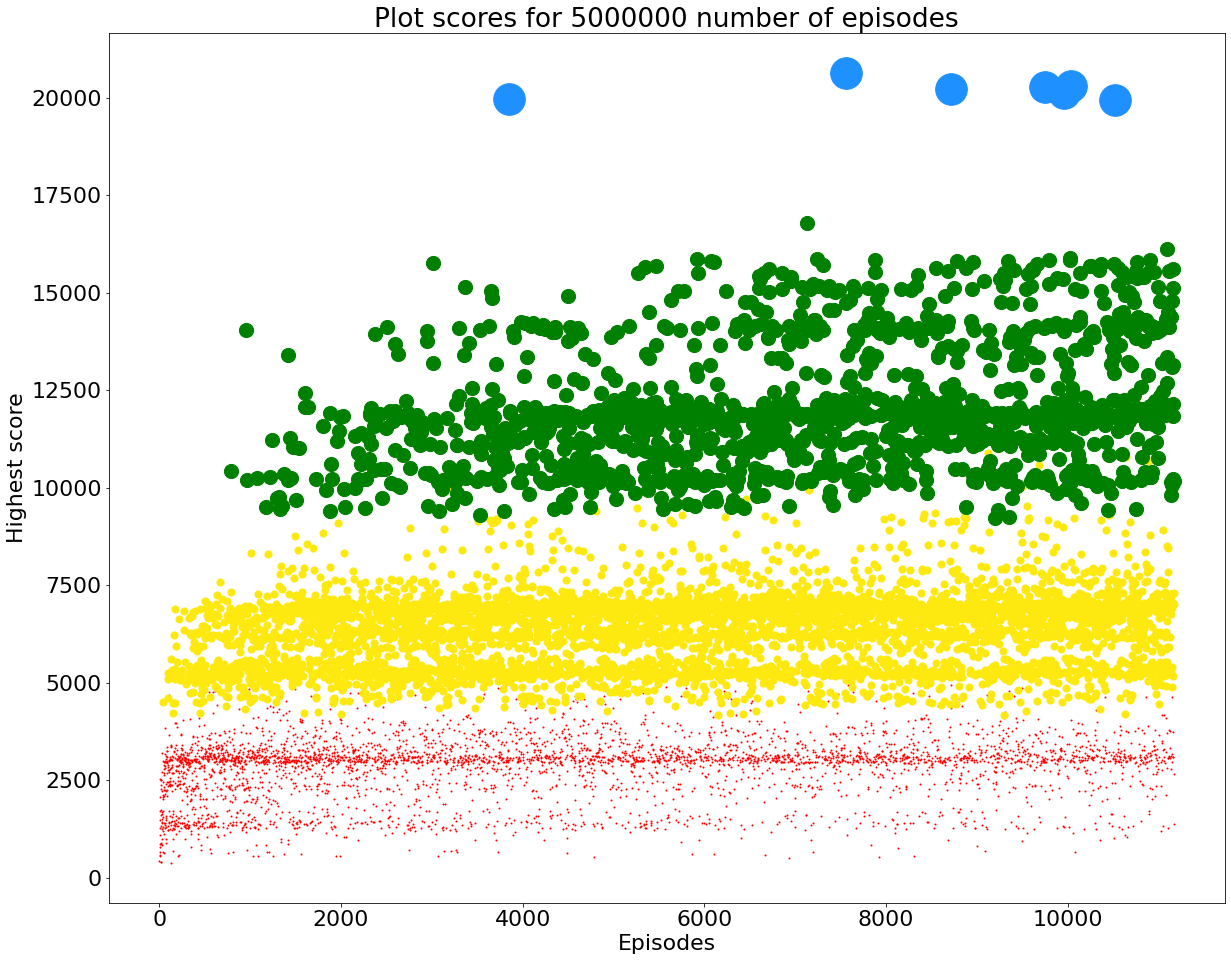

In [67]:
plotScores(df_5e6, num_steps_5e6)